In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn import linear_model, grid_search
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(-10, 10, 20)
Y = 0.001 * (X*X*X + X*X + X) + np.random.normal(0, 0.1, len(X))
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X[:, np.newaxis])

In [3]:
parameters1 = {'alpha' : np.logspace(-3, 1, 100)}
parameters2 = {'alpha' : np.logspace(1, 4, 100)}
parameters3 = {'alpha' : np.logspace(-3, 1, 100), 'l1_ratio' : np.logspace(-1, 0, 10)}

In [4]:
model_l1 = grid_search.GridSearchCV(linear_model.LassoLars(), parameters1, cv=10)
model_l1.fit(X_poly, Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LassoLars(alpha=1.0, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   1.09750e-03, ...,   9.11163e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [5]:
print("Lasso Regresion : ")
print(model_l1.best_params_)
print(model_l1.best_estimator_.coef_)

Lasso Regresion : 
{'alpha': 0.012328467394420665}
[ 0.          0.          0.          0.00096068  0.          0.          0.
  0.          0.          0.          0.        ]


In [6]:
model_l2 = grid_search.GridSearchCV(linear_model.Ridge(), parameters2, cv=10)
model_l2.fit(X_poly, Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([    10.     ,     10.72267, ...,   9326.03347,  10000.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [7]:
print("Ridge Regresion : ")
print(model_l2.best_params_)
print(model_l2.best_estimator_.coef_)

Ridge Regresion : 
{'alpha': 1000.0}
[  0.00000000e+00  -3.12149602e-05   9.80199870e-04   3.86867268e-04
   1.61346801e-04   4.99304868e-05  -5.32263503e-06  -9.24182359e-07
   5.75294680e-08   4.96659350e-09  -2.03590455e-10]


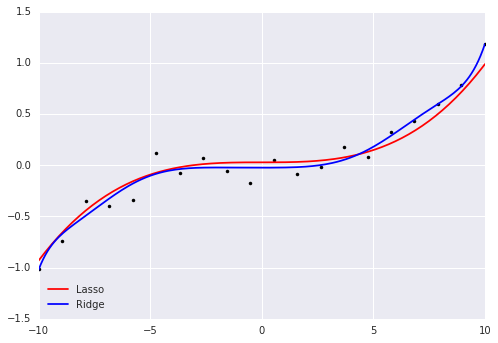

In [10]:
xs = np.linspace(-10, 10, 200)
Y_predict_1 = model_l1.predict(poly.fit_transform(xs[:, np.newaxis]))
Y_predict_2 = model_l2.predict(poly.fit_transform(xs[:, np.newaxis]))

plt.plot(X, Y, ".", color="k")
plt.plot(xs, Y_predict_1, "-", color="r", label="Lasso")
plt.plot(xs, Y_predict_2, "-", color="b", label="Ridge")
plt.legend(loc="lower left")
plt.show()